In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
kbo = pd.read_csv('./kbobattingdata.csv')
kbo.head(10)

,year,team,average_batter_age,runs_per_game,games,plate_appearances,at_bats,runs,hits,doubles,...,batting_average,OBP,SLG,OPS,total_bases,GDP,HBP,sacrifice_hits,sacrifice_flies,IBB
0,2021,SSG Landers,30.9,5.26,143,5698,4864,752,1268,203,...,0.261,0.354,0.421,0.775,2049,104,93,55,52,23.0
1,2021,Doosan Bears,29.0,5.13,143,5606,4867,733,1306,234,...,0.268,0.350,0.391,0.741,1901,137,86,45,52,12.0
2,2021,Lotte Giants,29.0,5.06,143,5689,4978,723,1384,263,...,0.278,0.356,0.399,0.755,1985,114,53,37,45,18.0
3,2021,Kiwoom Heroes,27.1,5.01,143,5610,4839,716,1250,243,...,0.258,0.347,0.376,0.722,1819,92,93,34,55,17.0
4,2021,KT Wiz,29.4,4.97,143,5581,4773,711,1263,217,...,0.265,0.356,0.380,0.736,1814,105,58,68,43,27.0
5,2021,Samsung Lions,30.0,4.90,143,5505,4798,701,1280,203,...,0.267,0.343,0.398,0.741,1907,98,55,47,67,21.0
6,2021,NC Dinos,29.0,4.87,143,5492,4772,697,1244,202,...,0.261,0.343,0.416,0.759,1984,92,111,59,43,14.0
7,2021,LG Twins,28.4,4.56,143,5496,4721,652,1185,208,...,0.251,0.342,0.369,0.711,1742,102,93,51,45,16.0
8,2021,Hanwha Eagles,25.6,4.17,143,5460,4651,596,1104,211,...,0.237,0.335,0.342,0.676,1589,110,74,54,49,14.0
9,2021,Kia Tigers,27.9,3.97,143,5546,4800,567,1193,183,...,0.249,0.338,0.336,0.674,1613,118,73,41,37,16.0


#### 컬럼 내용 및 결측치 확인하기

In [4]:
kbo.isnull().sum()

year                    0
team                    0
average_batter_age      0
runs_per_game           0
games                   0
plate_appearances       0
at_bats                 0
runs                    0
hits                    0
doubles                 0
triples                 0
homeruns                0
RBI                     0
stolen_bases          139
caught_stealing       139
bases_on_balls          0
strikeouts              0
batting_average         0
OBP                     0
SLG                     0
OPS                     0
total_bases             0
GDP                     0
HBP                     0
sacrifice_hits          0
sacrifice_flies         0
IBB                   139
dtype: int64

#### 데이터 필터링
* KBO 출범 이후 2021년까지 팀의 스폰서를 지속적으로 유지한 롯데와 삼성에 대한 데이터 필터링

In [5]:
rec = kbo['team'] == 'Samsung Lions'
kbo_samsung = kbo[rec]
kbo_samsung

,year,team,average_batter_age,runs_per_game,games,plate_appearances,at_bats,runs,hits,doubles,...,batting_average,OBP,SLG,OPS,total_bases,GDP,HBP,sacrifice_hits,sacrifice_flies,IBB
5,2021,Samsung Lions,30.0,4.90,143,5505,4798,701,1280,203,...,0.267,0.343,0.398,0.741,1907,98,55,47,67,21.0
17,2020,Samsung Lions,28.2,4.85,144,5574,4923,699,1317,211,...,0.268,0.338,0.394,0.732,1939,117,62,50,53,10.0
26,2019,Samsung Lions,28.8,4.32,144,5533,4866,622,1245,230,...,0.256,0.329,0.389,0.718,1893,107,78,58,53,15.0
36,2018,Samsung Lions,29.8,5.39,144,5766,5109,776,1471,241,...,0.288,0.355,0.432,0.787,2208,115,87,57,45,14.0
45,2017,Samsung Lions,29.2,5.26,144,5707,5095,757,1419,255,...,0.279,0.340,0.428,0.768,2181,97,70,58,55,17.0
52,2016,Samsung Lions,29.7,5.92,144,5863,5093,852,1492,249,...,0.293,0.367,0.439,0.806,2235,119,75,88,55,15.0
61,2015,Samsung Lions,29.1,6.23,144,5803,5019,897,1515,259,...,0.302,0.378,0.469,0.847,2352,109,70,76,57,21.0
71,2014,Samsung Lions,29.1,6.34,128,5152,4464,812,1345,238,...,0.301,0.377,0.473,0.850,2112,88,62,76,43,11.0
80,2013,Samsung Lions,29.1,5.23,128,5041,4370,669,1235,212,...,0.283,0.359,0.417,0.776,1820,98,93,84,41,9.0
88,2012,Samsung Lions,28.9,4.72,133,5160,4436,628,1205,200,...,0.272,0.353,0.389,0.742,1724,91,86,91,47,19.0


In [6]:
ret = kbo['team'] == 'Lotte Giants'
kbo_lotte = kbo[ret]
kbo_lotte

,year,team,average_batter_age,runs_per_game,games,plate_appearances,at_bats,runs,hits,doubles,...,batting_average,OBP,SLG,OPS,total_bases,GDP,HBP,sacrifice_hits,sacrifice_flies,IBB
2,2021,Lotte Giants,29.0,5.06,143,5689,4978,723,1384,263,...,0.278,0.356,0.399,0.755,1985,114,53,37,45,18.0
15,2020,Lotte Giants,29.9,5.21,144,5669,4958,750,1366,252,...,0.276,0.354,0.408,0.762,2023,148,55,39,48,18.0
29,2019,Lotte Giants,29.3,4.01,144,5488,4919,578,1231,214,...,0.250,0.316,0.358,0.674,1759,108,65,35,40,12.0
34,2018,Lotte Giants,30.1,5.70,144,5764,5130,821,1484,289,...,0.289,0.356,0.471,0.827,2416,124,81,45,37,22.0
46,2017,Lotte Giants,30.3,5.16,144,5671,4994,743,1425,250,...,0.285,0.356,0.433,0.789,2162,146,112,76,32,33.0
57,2016,Lotte Giants,29.0,5.40,144,5783,5001,777,1439,252,...,0.288,0.370,0.422,0.793,2112,120,83,62,41,18.0
64,2015,Lotte Giants,28.7,5.31,144,5680,4972,765,1393,254,...,0.280,0.356,0.446,0.802,2216,136,68,80,28,22.0
74,2014,Lotte Giants,28.6,5.59,128,5194,4487,716,1288,252,...,0.287,0.369,0.436,0.804,1955,95,70,62,41,19.0
85,2013,Lotte Giants,28.1,4.34,128,4978,4289,556,1118,208,...,0.261,0.345,0.360,0.705,1545,92,72,74,41,22.0
94,2012,Lotte Giants,28.3,3.83,133,5043,4481,509,1179,202,...,0.263,0.326,0.364,0.690,1632,91,54,107,26,19.0


In [7]:
kbo_one = pd.concat([kbo_lotte, kbo_samsung])
kbo_one

,year,team,average_batter_age,runs_per_game,games,plate_appearances,at_bats,runs,hits,doubles,...,batting_average,OBP,SLG,OPS,total_bases,GDP,HBP,sacrifice_hits,sacrifice_flies,IBB
2,2021,Lotte Giants,29.0,5.06,143,5689,4978,723,1384,263,...,0.278,0.356,0.399,0.755,1985,114,53,37,45,18.0
15,2020,Lotte Giants,29.9,5.21,144,5669,4958,750,1366,252,...,0.276,0.354,0.408,0.762,2023,148,55,39,48,18.0
29,2019,Lotte Giants,29.3,4.01,144,5488,4919,578,1231,214,...,0.250,0.316,0.358,0.674,1759,108,65,35,40,12.0
34,2018,Lotte Giants,30.1,5.70,144,5764,5130,821,1484,289,...,0.289,0.356,0.471,0.827,2416,124,81,45,37,22.0
46,2017,Lotte Giants,30.3,5.16,144,5671,4994,743,1425,250,...,0.285,0.356,0.433,0.789,2162,146,112,76,32,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1986,Samsung Lions,27.4,4.40,108,4118,3617,475,997,177,...,0.276,0.345,0.398,0.744,1440,74,48,68,31,NaN
299,1985,Samsung Lions,27.4,5.02,110,4241,3644,552,1005,181,...,0.276,0.354,0.417,0.771,1521,73,60,92,43,NaN
305,1984,Samsung Lions,26.6,4.35,100,3754,3298,435,889,148,...,0.270,0.343,0.396,0.739,1307,62,63,62,18,NaN
311,1983,Samsung Lions,26.0,4.48,100,3845,3383,448,889,143,...,0.263,0.333,0.393,0.726,1330,62,55,66,27,NaN


In [8]:
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [9]:
kbo_samsung

,year,team,average_batter_age,runs_per_game,games,plate_appearances,at_bats,runs,hits,doubles,...,batting_average,OBP,SLG,OPS,total_bases,GDP,HBP,sacrifice_hits,sacrifice_flies,IBB
5,2021,Samsung Lions,30.0,4.90,143,5505,4798,701,1280,203,...,0.267,0.343,0.398,0.741,1907,98,55,47,67,21.0
17,2020,Samsung Lions,28.2,4.85,144,5574,4923,699,1317,211,...,0.268,0.338,0.394,0.732,1939,117,62,50,53,10.0
26,2019,Samsung Lions,28.8,4.32,144,5533,4866,622,1245,230,...,0.256,0.329,0.389,0.718,1893,107,78,58,53,15.0
36,2018,Samsung Lions,29.8,5.39,144,5766,5109,776,1471,241,...,0.288,0.355,0.432,0.787,2208,115,87,57,45,14.0
45,2017,Samsung Lions,29.2,5.26,144,5707,5095,757,1419,255,...,0.279,0.340,0.428,0.768,2181,97,70,58,55,17.0
52,2016,Samsung Lions,29.7,5.92,144,5863,5093,852,1492,249,...,0.293,0.367,0.439,0.806,2235,119,75,88,55,15.0
61,2015,Samsung Lions,29.1,6.23,144,5803,5019,897,1515,259,...,0.302,0.378,0.469,0.847,2352,109,70,76,57,21.0
71,2014,Samsung Lions,29.1,6.34,128,5152,4464,812,1345,238,...,0.301,0.377,0.473,0.850,2112,88,62,76,43,11.0
80,2013,Samsung Lions,29.1,5.23,128,5041,4370,669,1235,212,...,0.283,0.359,0.417,0.776,1820,98,93,84,41,9.0
88,2012,Samsung Lions,28.9,4.72,133,5160,4436,628,1205,200,...,0.272,0.353,0.389,0.742,1724,91,86,91,47,19.0


<Axes: xlabel='years_r', ylabel='Count'>

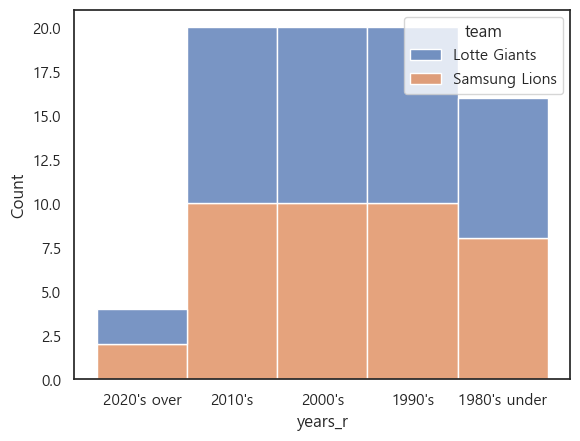

In [12]:
sns.histplot(data=kbo_one, x="years_r", hue="team", multiple='stack')

index: 0
index: 1


C:\Users\Admin\AppData\Local\Temp\ipykernel_11280\2570720488.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[index].set_yticklabels(axs[index].get_yticklabels(), rotation=90)


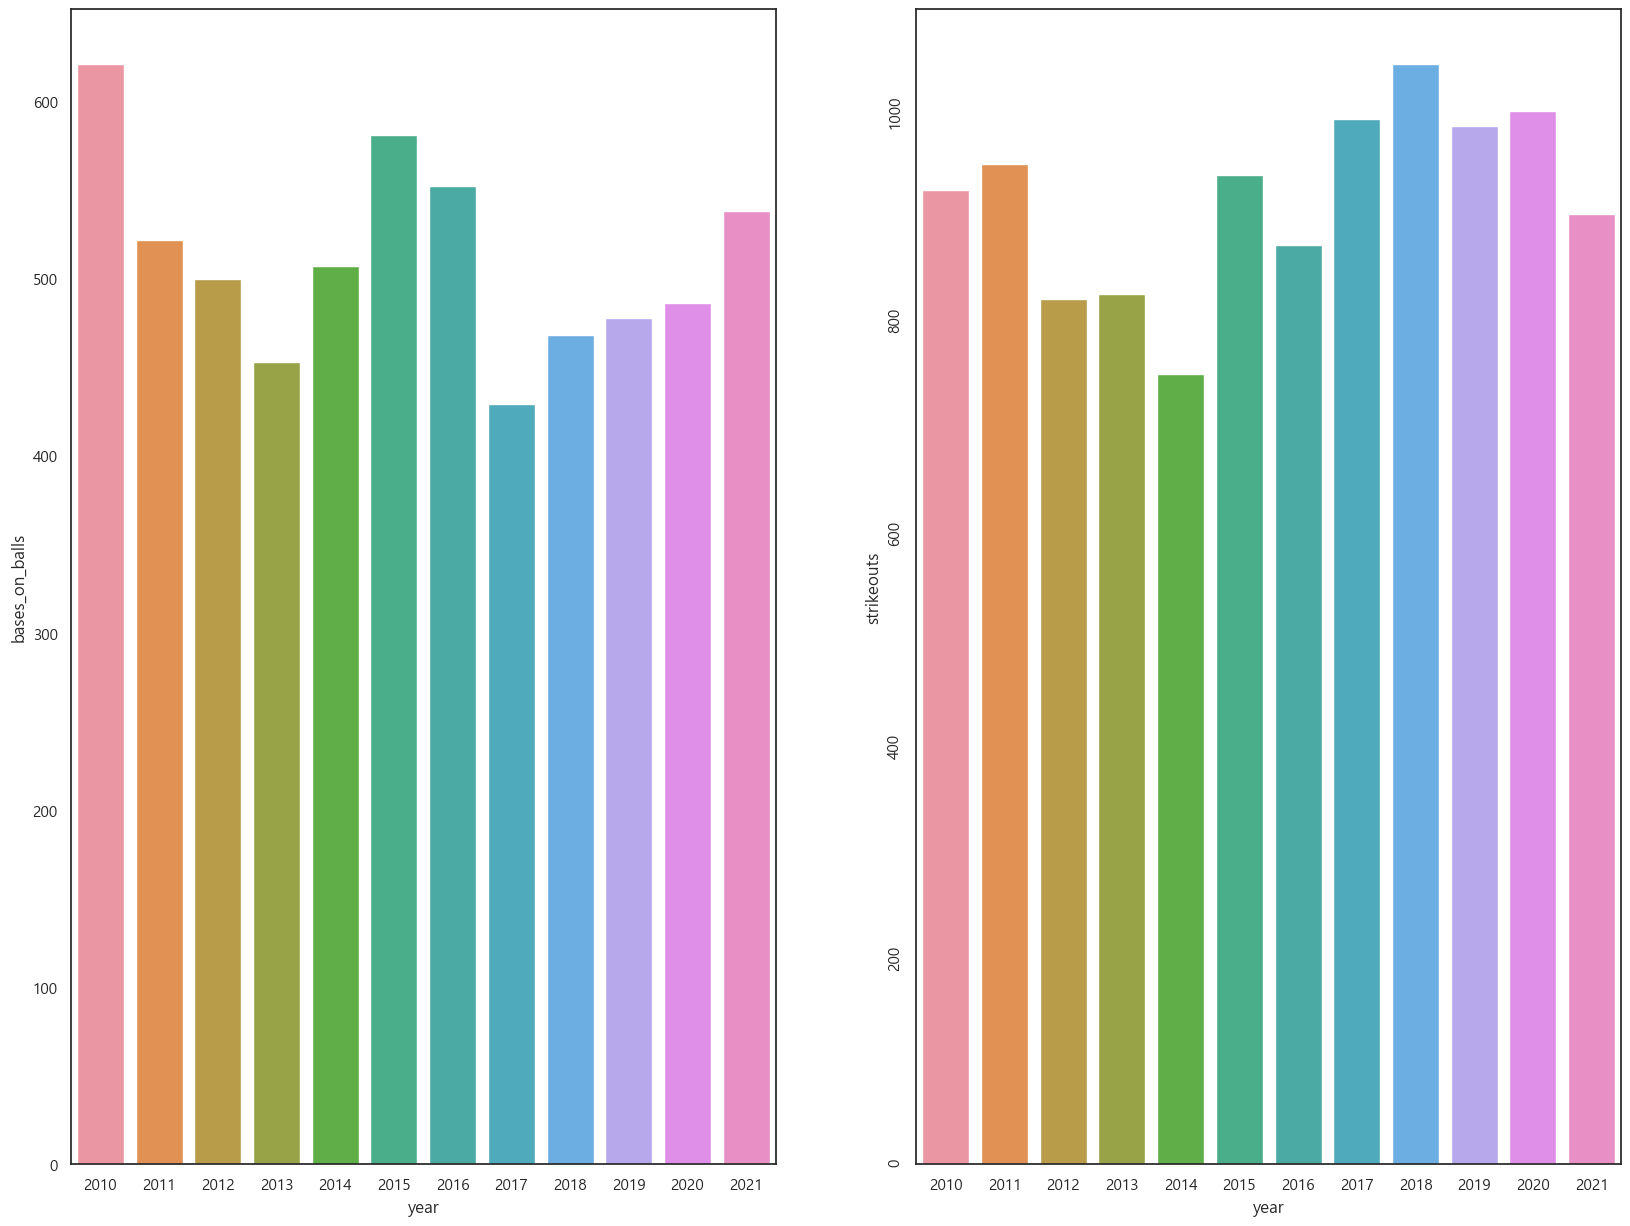

In [10]:
bat_columns = ['bases_on_balls', 'strikeouts']

fig, axs = plt.subplots(nrows=1, ncols=len(bat_columns), figsize=(20, 15))
rec = kbo_samsung['year'] >= 2010
kbo_samsung2 = kbo_samsung[rec]
kbo_samsung2
for index, column in enumerate(bat_columns):
    print('index:', index)
    sns.barplot(data = kbo_samsung2, x = 'year', y = column, ax=axs[index])
    if index == 1:
         axs[index].set_yticklabels(axs[index].get_yticklabels(), rotation=90)

In [11]:
kbo_one['years_r'] = np.where(kbo_one['year']>=2020, "2020's over", np.where(kbo_one['year']>=2010, "2010's", np.where(kbo_one['year']>=2000, "2000's",np.where(kbo_one['year']>=1990, "1990's", "1980's under"))))

[(1980.0, 2022.0),
 (24.0, 33.0),
 Text(0.5, 0, '연도'),
 Text(0, 0.5, '평균 나이'),
 Text(0.5, 1.0, '출범 이후 시즌 별 타자 평균 나이')]

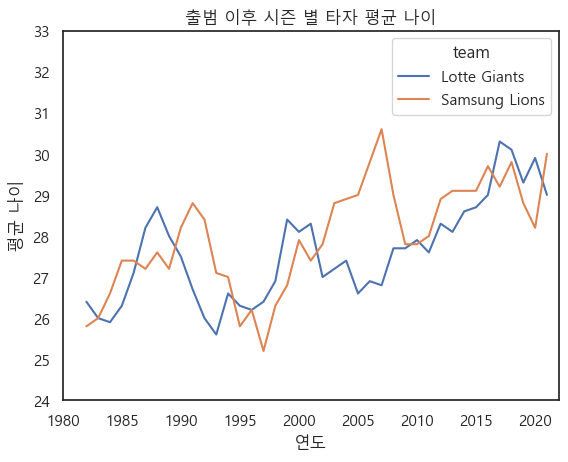

In [13]:
sns.lineplot(data = kbo_one, x = 'year', y = 'average_batter_age', hue = 'team').set(xlim = [1980, 2022], ylim = [24, 33], xlabel = '연도', ylabel = '평균 나이', title = '출범 이후 시즌 별 타자 평균 나이')

In [14]:
rec = kbo_one['games'] >= 144
kbo_one2 = kbo_one[rec]
kbo_one2

,year,team,average_batter_age,runs_per_game,games,plate_appearances,at_bats,runs,hits,doubles,...,OBP,SLG,OPS,total_bases,GDP,HBP,sacrifice_hits,sacrifice_flies,IBB,years_r
15,2020,Lotte Giants,29.9,5.21,144,5669,4958,750,1366,252,...,0.354,0.408,0.762,2023,148,55,39,48,18.0,2020's over
29,2019,Lotte Giants,29.3,4.01,144,5488,4919,578,1231,214,...,0.316,0.358,0.674,1759,108,65,35,40,12.0,2010's
34,2018,Lotte Giants,30.1,5.70,144,5764,5130,821,1484,289,...,0.356,0.471,0.827,2416,124,81,45,37,22.0,2010's
46,2017,Lotte Giants,30.3,5.16,144,5671,4994,743,1425,250,...,0.356,0.433,0.789,2162,146,112,76,32,33.0,2010's
57,2016,Lotte Giants,29.0,5.40,144,5783,5001,777,1439,252,...,0.370,0.422,0.793,2112,120,83,62,41,18.0,2010's
64,2015,Lotte Giants,28.7,5.31,144,5680,4972,765,1393,254,...,0.356,0.446,0.802,2216,136,68,80,28,22.0,2010's
17,2020,Samsung Lions,28.2,4.85,144,5574,4923,699,1317,211,...,0.338,0.394,0.732,1939,117,62,50,53,10.0,2020's over
26,2019,Samsung Lions,28.8,4.32,144,5533,4866,622,1245,230,...,0.329,0.389,0.718,1893,107,78,58,53,15.0,2010's
36,2018,Samsung Lions,29.8,5.39,144,5766,5109,776,1471,241,...,0.355,0.432,0.787,2208,115,87,57,45,14.0,2010's
45,2017,Samsung Lions,29.2,5.26,144,5707,5095,757,1419,255,...,0.340,0.428,0.768,2181,97,70,58,55,17.0,2010's


[(0.0, 10.0),
 Text(0.5, 0, '팀'),
 Text(0, 0.5, '평균 득점'),
 Text(0.5, 1.0, '144경기 기준 시즌 별 평균 득점')]

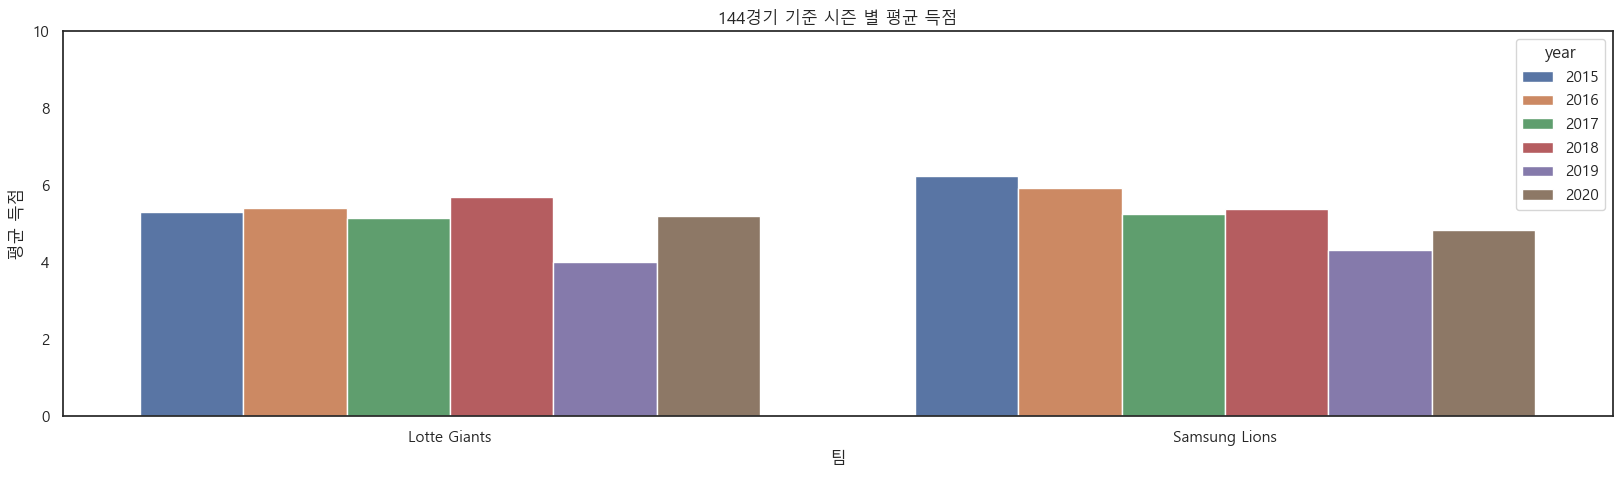

In [15]:
fig, ax = plt.subplots(figsize =(20,5))
sns.barplot(x='team', y='runs_per_game', hue = 'year', data=kbo_one2).set(ylim = [0, 10], xlabel = '팀', ylabel = '평균 득점', title = '144경기 기준 시즌 별 평균 득점')

[(-50.0, 300.0),
 Text(0.5, 0, '팀'),
 Text(0, 0.5, '홈런 개수'),
 Text(0.5, 1.0, '144경기 기준 홈런 개수')]

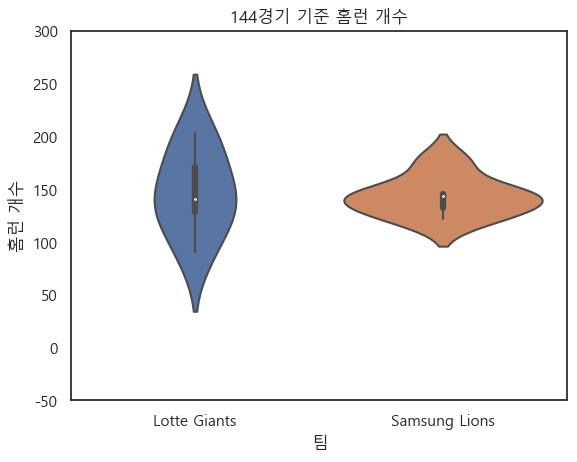

In [16]:
sns.violinplot(y='homeruns', data=kbo_one2, x = 'team').set(ylim = [-50, 300], xlabel = '팀', ylabel = '홈런 개수', title = '144경기 기준 홈런 개수')

In [17]:
kbo_one

,year,team,average_batter_age,runs_per_game,games,plate_appearances,at_bats,runs,hits,doubles,...,OBP,SLG,OPS,total_bases,GDP,HBP,sacrifice_hits,sacrifice_flies,IBB,years_r
2,2021,Lotte Giants,29.0,5.06,143,5689,4978,723,1384,263,...,0.356,0.399,0.755,1985,114,53,37,45,18.0,2020's over
15,2020,Lotte Giants,29.9,5.21,144,5669,4958,750,1366,252,...,0.354,0.408,0.762,2023,148,55,39,48,18.0,2020's over
29,2019,Lotte Giants,29.3,4.01,144,5488,4919,578,1231,214,...,0.316,0.358,0.674,1759,108,65,35,40,12.0,2010's
34,2018,Lotte Giants,30.1,5.70,144,5764,5130,821,1484,289,...,0.356,0.471,0.827,2416,124,81,45,37,22.0,2010's
46,2017,Lotte Giants,30.3,5.16,144,5671,4994,743,1425,250,...,0.356,0.433,0.789,2162,146,112,76,32,33.0,2010's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1986,Samsung Lions,27.4,4.40,108,4118,3617,475,997,177,...,0.345,0.398,0.744,1440,74,48,68,31,NaN,1980's under
299,1985,Samsung Lions,27.4,5.02,110,4241,3644,552,1005,181,...,0.354,0.417,0.771,1521,73,60,92,43,NaN,1980's under
305,1984,Samsung Lions,26.6,4.35,100,3754,3298,435,889,148,...,0.343,0.396,0.739,1307,62,63,62,18,NaN,1980's under
311,1983,Samsung Lions,26.0,4.48,100,3845,3383,448,889,143,...,0.333,0.393,0.726,1330,62,55,66,27,NaN,1980's under


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


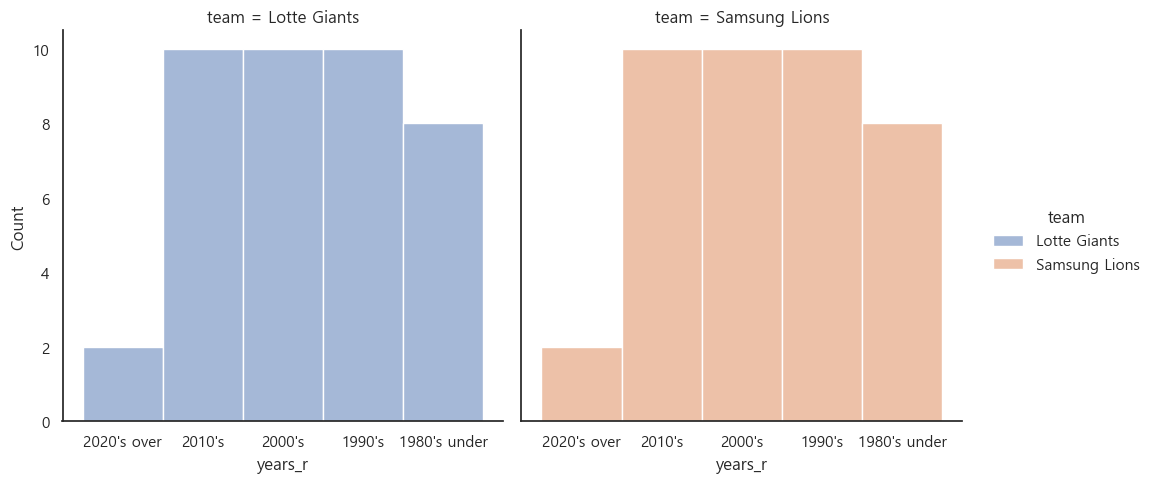

In [18]:
sns.displot(data=kbo_one, x="years_r", hue="team", col="team")

<Axes: xlabel='team', ylabel='batting_average'>

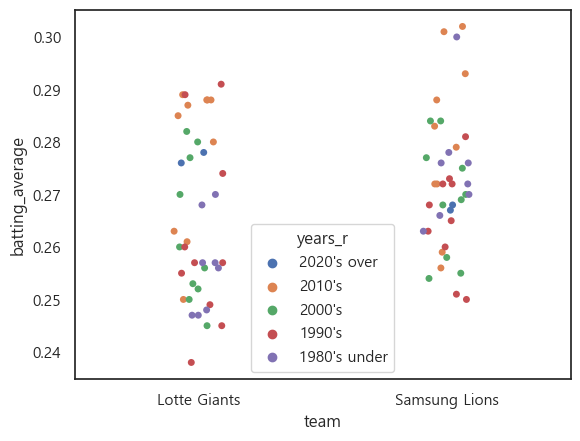

In [19]:
sns.stripplot(x = 'team', y = 'batting_average', data = kbo_one, hue = 'years_r')

<Axes: xlabel='year', ylabel='OPS'>

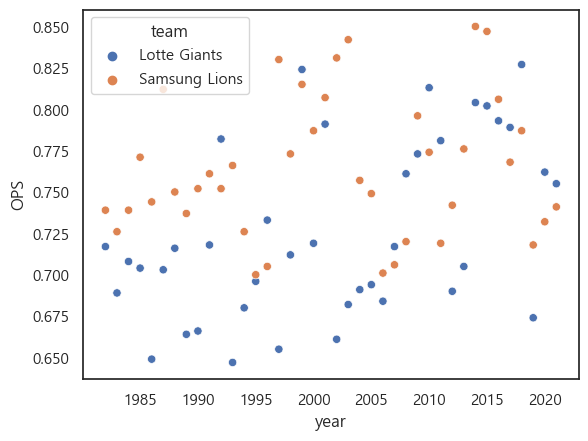

In [20]:
sns.scatterplot(data=kbo_one, x="year", y="OPS", hue="team")

<Axes: xlabel='years_r', ylabel='RBI'>

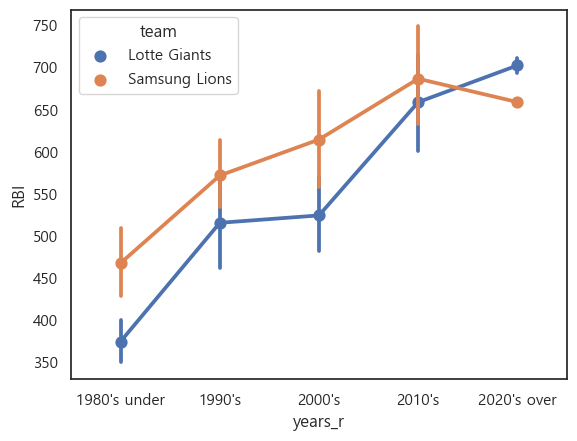

In [21]:
ord = ["1980's under", "1990's", "2000's", "2010's", "2020's over"]
sns.pointplot(data=kbo_one, y="RBI", x="years_r", hue="team", order = ord)

<Axes: xlabel='years_r', ylabel='doubles'>

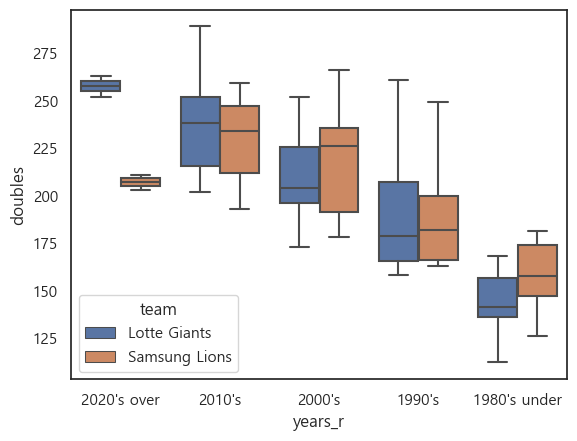

In [22]:
sns.boxplot(x='years_r', y='doubles', data=kbo_one, hue = 'team')

In [33]:
rec = kbo['year'] >= 2010
kbo2 = kbo[rec]
kbo3 = kbo2[['team', 'runs', 'hits', 'doubles', 'triples', 'homeruns']]
kbo3

,team,runs,hits,doubles,triples,homeruns
0,SSG Landers,752,1268,203,13,184
1,Doosan Bears,733,1306,234,17,109
2,Lotte Giants,723,1384,263,10,106
3,Kiwoom Heroes,716,1250,243,28,90
4,KT Wiz,711,1263,217,11,104
...,...,...,...,...,...,...
107,LG Twins,688,1270,223,17,121
108,Samsung Lions,681,1207,212,14,118
109,Kia Tigers,611,1148,190,17,106
110,Nexen Heroes,570,1165,199,20,87


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


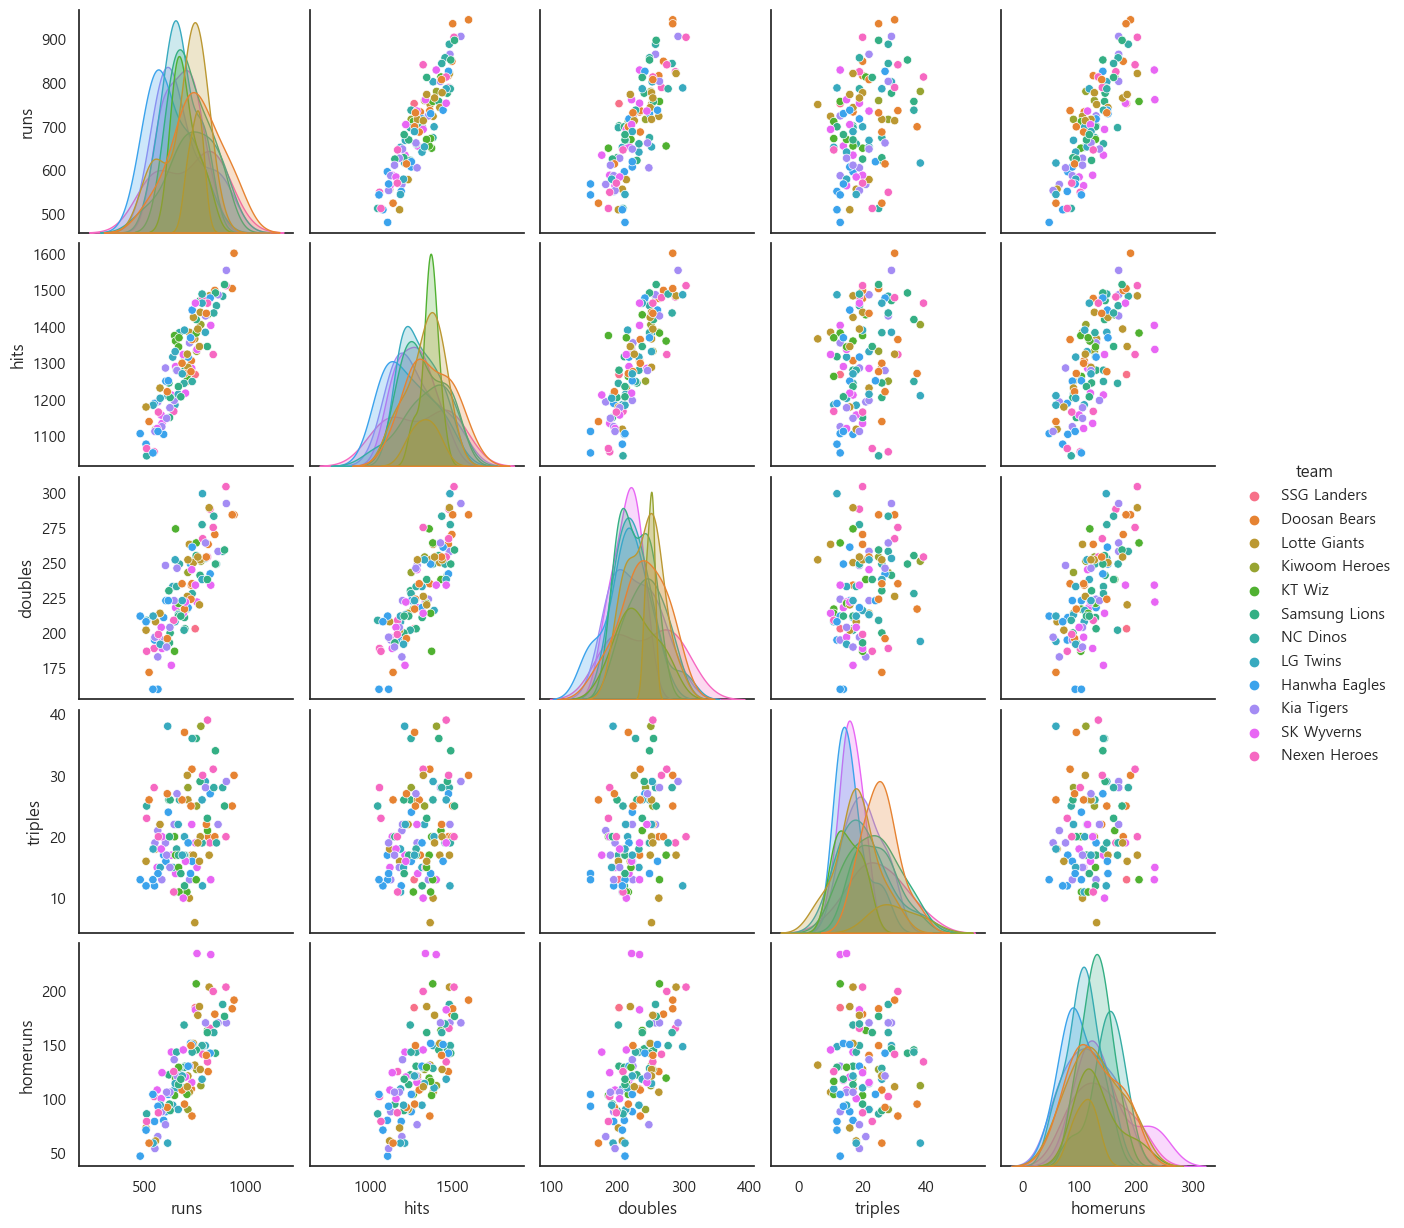

In [34]:
sns.pairplot(data=kbo3, hue="team")

In [40]:
kbo_samsung3 = kbo_samsung[['stolen_bases', 'caught_stealing', 'RBI', 'homeruns']]
corr = kbo_samsung3.corr()
corr

,stolen_bases,caught_stealing,RBI,homeruns
stolen_bases,1.000000,0.847107,0.125000,-0.247094
caught_stealing,0.847107,1.000000,0.023176,-0.360810
RBI,0.125000,0.023176,1.000000,0.854472
homeruns,-0.247094,-0.360810,0.854472,1.000000


<Axes: >

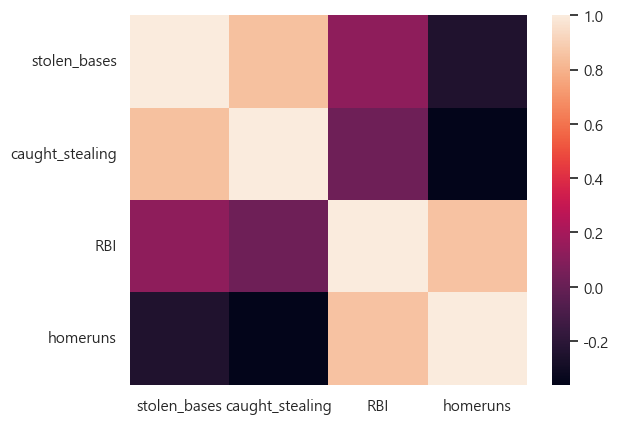

In [41]:
sns.heatmap(corr)